## Configuración

In [ ]:
#Introduce aquí los módulos a ocupar
from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import pandas as pd
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dropout, AveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# regularizacion
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dropout

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="white")
plt.style.use('dark_background')
pd.options.display.max_columns = 30
pd.options.display.max_colwidth = 250

random.seed(333)
tf.random.set_seed(333)

# Práctica 2 - Redes Neuronales Convolucionales

**Planteamiento del Problema:**

Se desea construir un clasificador de prendas utilizando Redes Neuronales Convolucionales y TensorFlow para realizar un análisis de tiempos de producción durante un proceso de manufactura para una maquiladora.

**Instrucciones**

1. **Análisis de Datos y Transformaciones (1 pts):**
   - Cargue el conjunto de datos Fashion MNIST (precargado en Keras) y realice un análisis exploratorio apoyándose en visualizaciones para obtener un mejor entendimiento de los datos. Aplique las transformaciones que considere necesarias para maximizar la precisión (accuracy).

2. **Definición de la Arquitectura del Modelo (2.5 pts):**
   - Defina una arquitectura basada en redes neuronales convolucionales utilizando TF2. El diseño debe considerar un mínimo de 10 capas en total, incluyendo al menos una capa convolucional, una capa pooling y una capa fully connected. Strides, padding, dimensiones del kernel y la cantidad de filtros deben ser definidos de forma explícita.

   Ejemplo de arquitectura válida: CONV -> MAXPOOL -> CONV -> AVGPOOL -> CONV -> CONV -> MAXPOOL -> FLATTEN -> DENSE -> DENSE.

3. **Justificación de Dimensiones y Parámetros (4 pts):**
   - Justifique las dimensiones para cada tensor y la cantidad de parámetros en cada capa según su diseño de arquitectura. Apóyese en el método `summary()` de TensorFlow.

4. **Entrenamiento, Optimización y Evaluación del Modelo (2.5 pts):**
   - Entrene, optimice, evalúe y diagnostique el modelo proponiendo siguientes pasos para mejorarlo.

#### Conjunto de Datos

**Fashion MNIST (Retail)**

El conjunto de datos se encuentra disponible en TF2-Keras.

Este conjunto de datos incluye 10 etiquetas de diferentes prendas de vestir con imágenes de 28 x 28 *en escala de grises*. El conjunto de entrenamiento cuenta con 60,000 imágenes y el conjunto de prueba cuenta con 10,000 imágenes.

Descripción de las etiquetas (variable objetivo):

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


In [ ]:
# Carga de datos
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Definición de clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


# Análisis Exploratorio

In [ ]:
# Muestra
single_image = X_train[0]
single_image.shape

(28, 28)

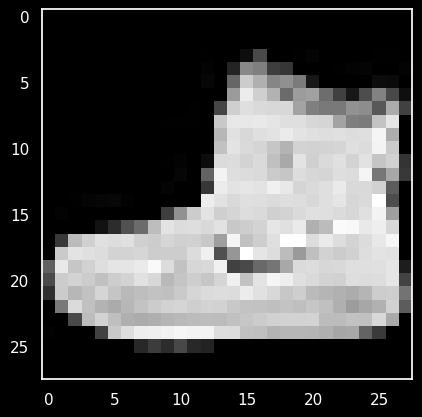

In [ ]:
plt.imshow(single_image, cmap='gray');

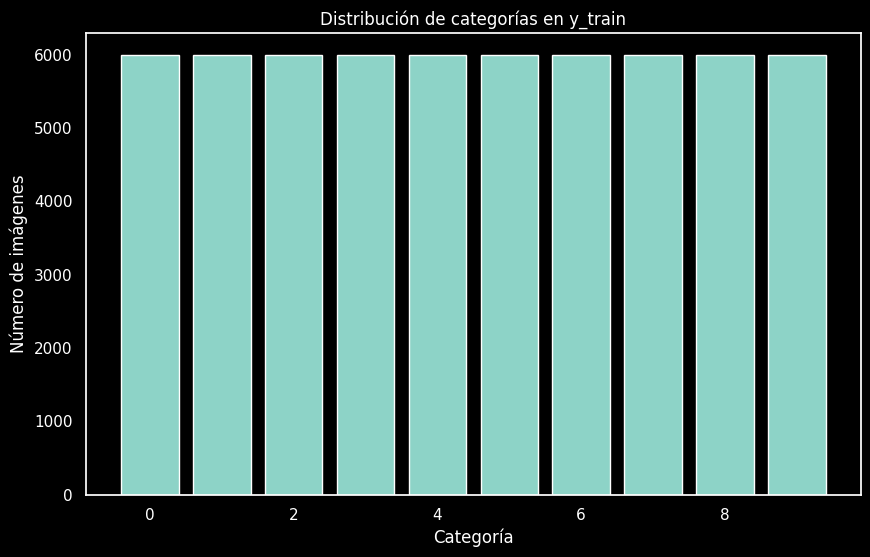

In [ ]:
categories = {}
for cat in y_train:
  if cat not in categories:
    categories[cat] = 0
  categories[cat] += 1

labels = list(categories.keys())
values = list(categories.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel("Categoría")
plt.ylabel("Número de imágenes")
plt.title("Distribución de categorías en y_train")
plt.show()

# Preprocesamiento de Datos

## Construcción de la target

In [ ]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

In [ ]:
pd.Series(y_test).value_counts()

9    1000
2    1000
1    1000
6    1000
4    1000
5    1000
7    1000
3    1000
8    1000
0    1000
Name: count, dtype: int64

In [ ]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [ ]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Procesamiento

In [ ]:
single_image.min(), single_image.max()

(0, 255)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
scaled_single = X_train[0]
scaled_single.min(), scaled_single.max()

(0.0, 1.0)

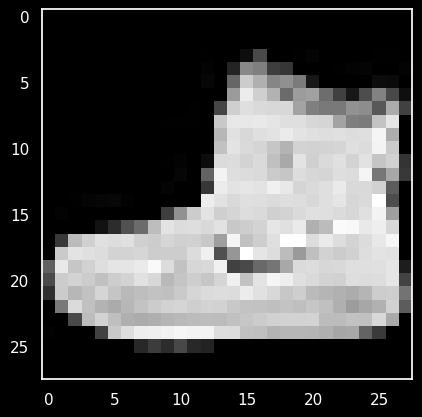

In [ ]:
plt.imshow(scaled_single, cmap='gray');

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Agregamos una dimensión extra que indica el canal

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(10000, 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

# Modelo

## Diseño de la arquitectura

In [ ]:
model = Sequential()
# Capa convolucional
model.add(Conv2D(filters=256, kernel_size=(3), input_shape=(28, 28, 1), activation='relu'))
# Capa convolucional
model.add(Conv2D(filters=256, kernel_size=(3), activation='relu'))
# Capa convolucional
model.add(Conv2D(filters=512, kernel_size=(3), activation='relu'))
# Capa Pooling
model.add(MaxPool2D(pool_size=(2)))
# Aplanado/desenrollado de imágenes de 28x28 a 784 antes de la capa final
model.add(Flatten())
# 256 neuronas en la capa oculta densa (es variable y puedes modificarla)
model.add(Dense(256, activation='relu'))
# Capa de Dropout
model.add(Dropout(0.25))
# 128 neuronas en la capa oculta densa (es variable y puedes modificarla)
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
# Capa de Dropout
# model.add(Dropout(0.25))
# 64 neuronas en la capa oculta densa (es variable y puedes modificarla)
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
# Capa de Dropout
model.add(Dropout(0.25))
# La última capa es el clasificador de 10 posibles
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2)


Se eligió esta arquitectura tras probar modelos con más capas convolucionales y capas de pooling, las cuales resultaron en una reducción excesiva de variables, dificultando el aprendizaje efectivo del modelo. Esta configuración balanceada permite un procesamiento adecuado de las imágenes sin perder demasiada información. Además, se incorporaron capas de dropout y regularizadores para prevenir el sobreajuste, mejorando la generalización del modelo en datos no vistos.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 256)       2560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       590080    
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 512)       1180160   
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 512)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 61952)             0         
                                                                 
 dense (Dense)               (None, 256)               15859968  
                                                        

## Entrenamiento

In [ ]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 79s 32ms/step - loss: 1.4418 - accuracy: 0.8302 - val_loss: 0.4962 - val_accuracy: 0.8757
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.4633 - accuracy: 0.8890 - val_loss: 0.4258 - val_accuracy: 0.8901
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3956 - accuracy: 0.9070 - val_loss: 0.4144 - val_accuracy: 0.9041
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3564 - accuracy: 0.9198 - val_loss: 0.3675 - val_accuracy: 0.9162
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3180 - accuracy: 0.9279 - val_loss: 0.3444 - val_accuracy: 0.9182
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2957 - accuracy: 0.9375 - val_loss: 0.3707 - val_accuracy: 0.9166
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2700 - accuracy: 0.9457 - val_loss: 0.3278 -

## Evaluación del modelo

In [ ]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.441812,0.830183,0.496235,0.8757
1,0.463315,0.888967,0.425765,0.8901
2,0.395585,0.906983,0.414411,0.9041
3,0.356393,0.919833,0.367495,0.9162
4,0.317967,0.927850,0.344434,0.9182
5,0.295679,0.937500,0.370654,0.9166
6,0.269968,0.945733,0.327834,0.9267
7,0.251042,0.950783,0.359410,0.9232
8,0.234992,0.957600,0.377598,0.9208


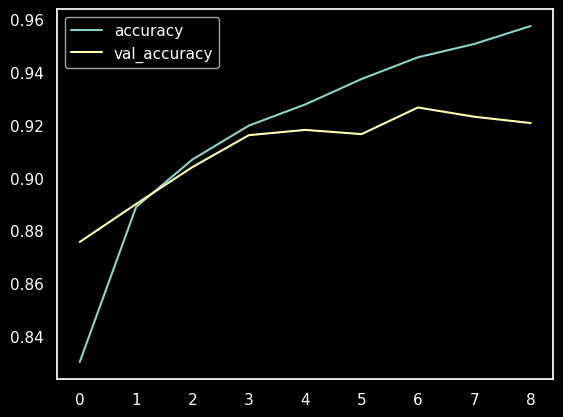

In [ ]:
losses[['accuracy','val_accuracy']].plot();

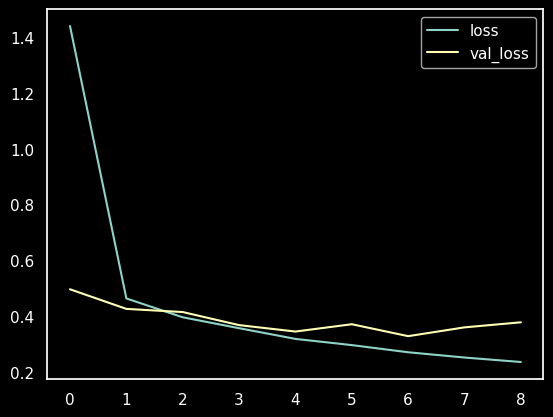

In [ ]:
losses[['loss','val_loss']].plot();

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[0.37759795784950256, 0.920799970626831]


In [ ]:
predictions_ = model.predict(X_test)
predictions = np.argmax(predictions_, axis=1)

313/313 [==============================] - 2s 8ms/step


In [ ]:
y_test, predictions

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8), array([9, 2, 1, ..., 8, 1, 5]))

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.93      0.87      1000
           3       0.96      0.89      0.92      1000
           4       0.88      0.87      0.88      1000
           5       0.99      0.98      0.98      1000
           6       0.78      0.76      0.77      1000
           7       0.95      0.98      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



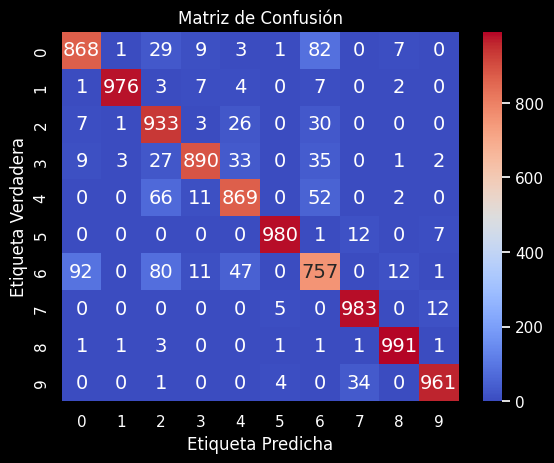

In [ ]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g', cmap='coolwarm', annot_kws={"size": 14})

plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

## Predicción del modelo

In [ ]:
IMG= X_test[0]
IMG.shape

(28, 28, 1)

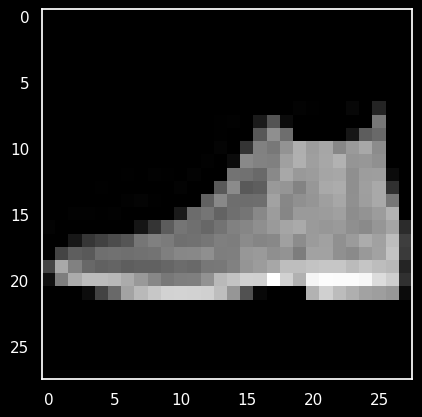

In [ ]:
plt.imshow(IMG.reshape(28,28), cmap='gray');

Conclusiones:

Se hicieron pruebas utilizando diferentes arquitecturas con distintos números de capas, en una de ellas se configuraron solo 6 capas, la cuál alcanzó los mismos resultados que el modelo final, con lo cual concluimos que no necesariamente el tener más capas implica una mejora en el performance.